In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("../DATA/Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.duplicated().any()

False

In [8]:
df['total_spend'] = df['TV']+df['radio']+df['newspaper']

In [9]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

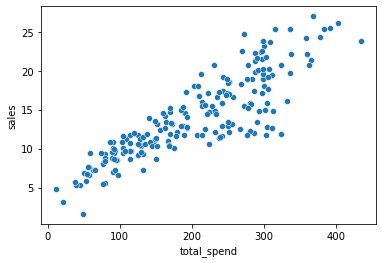

In [10]:
sns.scatterplot(data=df, x='total_spend', y='sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

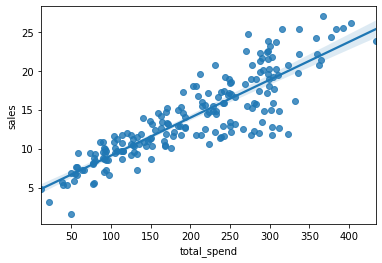

In [11]:
sns.regplot(data=df, x='total_spend', y='sales')

In [12]:
X = df['total_spend']
y = df['sales']

In [13]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [14]:
x = np.linspace(0, 500, 100)
res = 0.04868788*x + 4.24302822

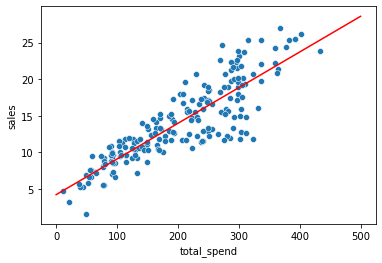

In [15]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(x, res, color='red')

In [16]:
np.polyfit(X, y, deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [19]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


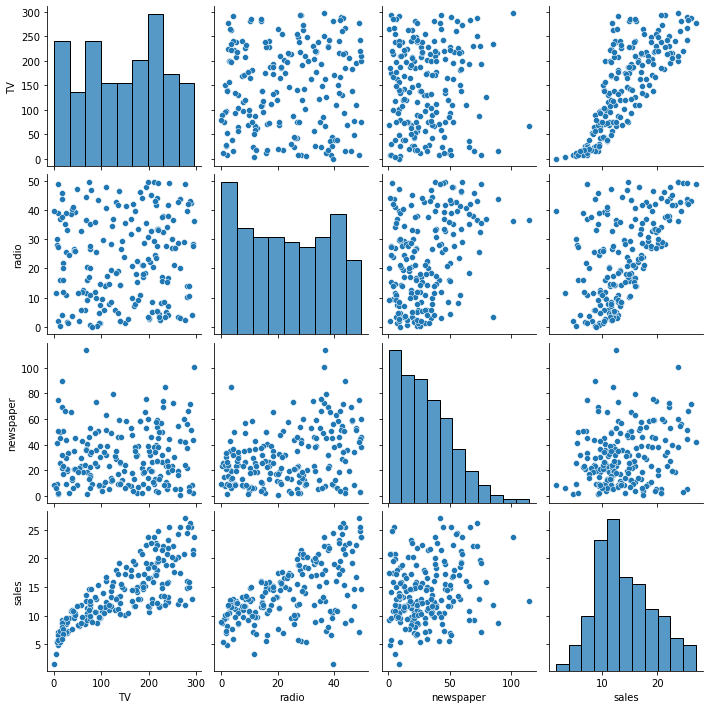

In [20]:
sns.pairplot(df)

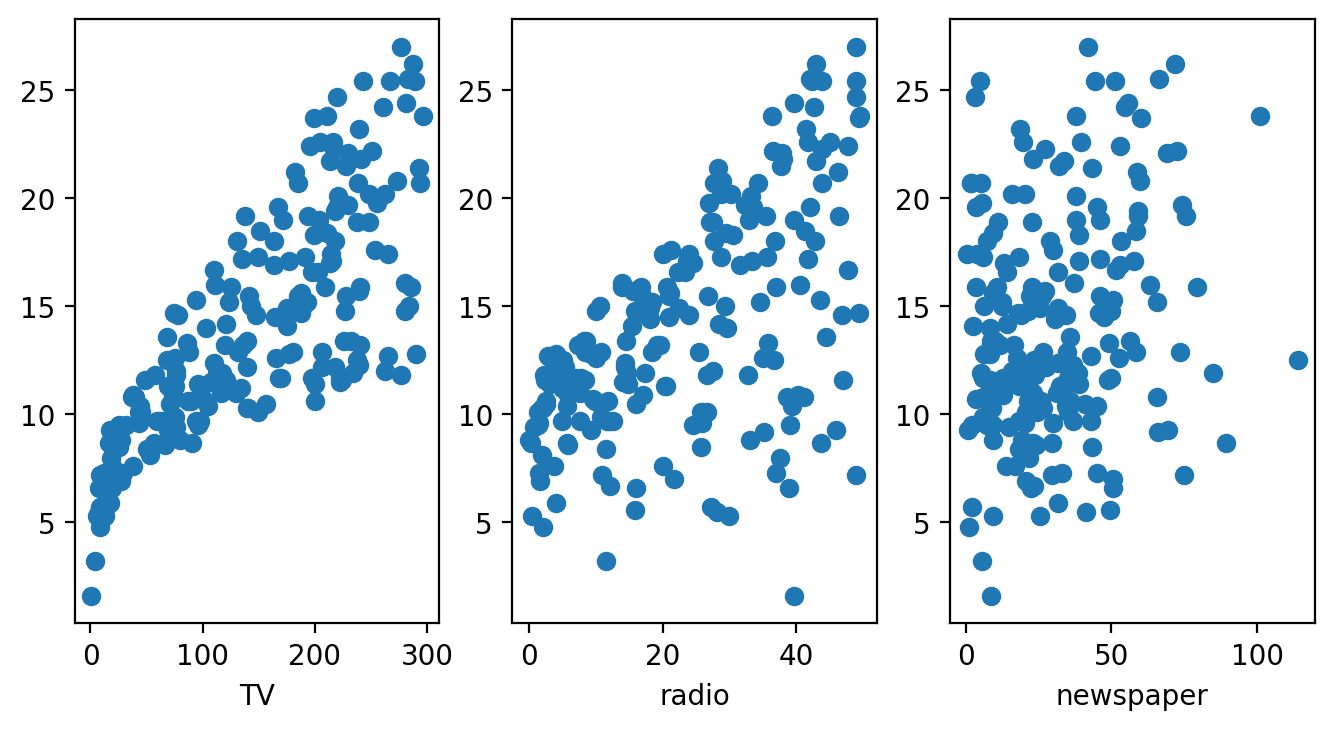

In [32]:
fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(8, 4), dpi=200)
ax[0].scatter(df['TV'], df['sales'])
ax[0].set_xlabel('TV')
ax[1].scatter(df['radio'], df['sales'])
ax[1].set_xlabel('radio')
ax[2].scatter(df['newspaper'], df['sales'])
ax[2].set_xlabel('newspaper')
plt.tight_layout;

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop('sales', axis=1)
y = df['sales']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
len(df)

200

In [38]:
len(X_train)

140

In [39]:
len(X_test)

60

In [40]:
X_train[:5]

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8


In [41]:
y_train[:5]

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
Name: sales, dtype: float64

In [42]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()

In [45]:
model.fit(X_train, y_train)

LinearRegression()

In [46]:
pred = model.predict(X_test)

In [47]:
pred

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
mean_absolute_error(y_test, pred)

1.2137457736144808

In [50]:
np.sqrt(mean_squared_error(y_test, pred))

1.5161519375993877

In [51]:
r2_score(y_test, pred)

0.9185780903322446

In [52]:
res = y_test - pred

C:\Users\mukesh\anaconda3\anacondadatascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


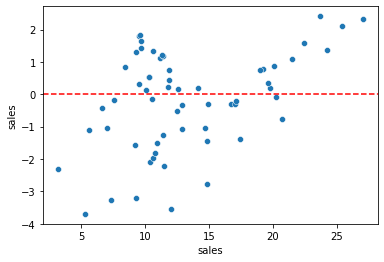

In [54]:
sns.scatterplot(y_test, res)
plt.axhline(y=0, color='red', linestyle="--")

In [55]:
import scipy as sp

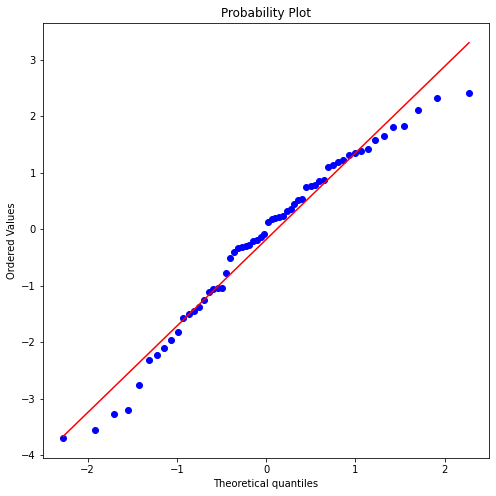

In [60]:
fig, ax = plt.subplots(figsize=(8,8))
_ = sp.stats.probplot(res, plot=ax)

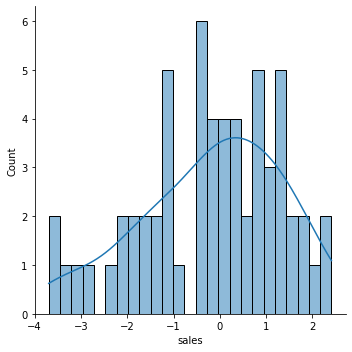

In [62]:
sns.displot(res, bins=25, kde=True)

In [63]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [64]:
final_model = model.fit(X, y)

In [65]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [66]:
from joblib import dump, load

In [67]:
dump(final_model, 'final_model.joblib')

['final_model.joblib']

In [69]:
model = load('final_model.joblib')

In [70]:
model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [71]:
test = [[120, 48, 20]]

In [72]:
model.predict(test)

array([17.45933778])

In [75]:
X_test.values

array([[ 74.7,  49.4,  45.7],
       [255.4,  26.9,   5.5],
       [112.9,  17.4,  38.6],
       [109.8,  47.8,  51.4],
       [ 31.5,  24.6,   2.2],
       [ 19.4,  16. ,  22.3],
       [262.7,  28.8,  15.9],
       [213.4,  24.6,  13.1],
       [140.3,   1.9,   9. ],
       [220.5,  33.2,  37.9],
       [ 38. ,  40.3,  11.9],
       [175.7,  15.4,   2.4],
       [222.4,   3.4,  13.1],
       [198.9,  49.4,  60. ],
       [193.7,  35.4,  75.6],
       [ 44.7,  25.8,  20.6],
       [262.9,   3.5,  19.5],
       [ 95.7,   1.4,   7.4],
       [ 50. ,  11.6,  18.4],
       [228. ,  37.7,  32. ],
       [ 19.6,  20.1,  17. ],
       [171.3,  39.7,  37.7],
       [276.9,  48.9,  41.8],
       [261.3,  42.7,  54.7],
       [ 69. ,   9.3,   0.9],
       [199.8,   3.1,  34.6],
       [293.6,  27.7,   1.8],
       [ 59.6,  12. ,  43.1],
       [165.6,  10. ,  17.6],
       [ 17.2,  45.9,  69.3],
       [ 23.8,  35.1,  65.9],
       [219.8,  33.5,  45.1],
       [134.3,   4.9,   9.3],
       [ 1

In [76]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [77]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
train_final = []
test_final = []
for d in range(1, 10):
    poly = PolynomialFeatures(degree=d, include_bias=False)
    poly_X = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.3, random_state=101)
    model = LinearRegression()
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_final.append(train_rmse)
    test_final.append(test_rmse)

In [80]:
train_final

[1.734594124329376,
 0.5879574085292233,
 0.4339344356902067,
 0.35170836883993534,
 0.2509342952029336,
 0.19933332834273104,
 5.4214215994181805,
 0.14237972100695595,
 0.16675080548552418]

In [81]:
test_final

[1.5161519375993873,
 0.6646431757269196,
 0.5803286825231453,
 0.5077742624232109,
 2.5758247603435955,
 4.490868529265006,
 1381.404235838588,
 4449.5681972303655,
 95893.0265813161]

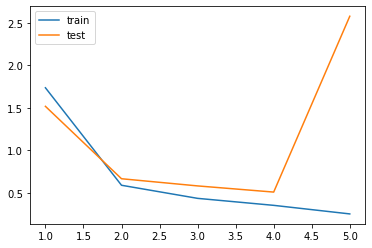

In [83]:
plt.plot(range(1, 6), train_final[:5], label='train')
plt.plot(range(1, 6), test_final[:5], label='test')
plt.legend();

In [84]:
final_poly = PolynomialFeatures(degree=2, include_bias=False)

In [85]:
final_model = LinearRegression()

In [86]:
final_x = final_poly.fit_transform(X)

In [87]:
final_model.fit(final_x, y)

LinearRegression()

In [88]:
final_x.shape

(200, 9)

In [89]:
final_model.coef_

array([ 5.16525487e-02,  2.10742970e-02,  6.88373531e-03, -1.09702663e-04,
        1.10525949e-03, -4.55155391e-05,  1.11997015e-04,  8.26605896e-05,
        1.19125650e-05])

In [90]:
dump(final_poly, 'final_poly.joblib')
dump(final_model, 'final_model.joblib')

['final_model.joblib']

In [92]:
model = load('final_model.joblib')

In [93]:
poly = load('final_poly.joblib')

In [100]:
campaign = [[142, 42, 88]]

In [101]:
pred_ev = poly.fit_transform(campaign)

In [102]:
model.predict(pred_ev)

array([18.31662089])